In [50]:
from __future__ import print_function
from IPython.display import clear_output
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


In [51]:
# Roteiro

# https://docs.google.com/document/d/1SyHDtzWWguxxy3dO7sssr-X7-wNFHxFSAQMQniVQ8bI/edit

In [52]:
morreu_de_verdade = 7
t_incub = 19
t_doenca = 69
compl_sintomas = 100

In [139]:
class Pessoas:
    def __init__(self, n, tam_x, tam_y, eps_vel, eps_dist, prob_infec, prob_morte, prob_retorno): ## eps_vel = mudança das direções das vel. e eps_dist = dist. infecção

        self.n = n ##numero de bolinhas
        self.tam_x = tam_x ##fronteira lateral
        self.tam_y = tam_y ##fronteira de cima
        self.eps_vel = eps_vel ##mudando as direções das velocidades
        self.eps_dist = eps_dist ## distância mínima de infecção
        self.prob_infec = prob_infec ## taxa de infecção
        self.prob_morte = prob_morte ## taxa de mortalidade
        self.prob_retorno = prob_retorno ## taxa de retorno à doença
        self.pos = np.random.rand(2,n) ##posição das bolinhas
        self.pos[0] *= tam_x ##reajustes
        self.pos[1] *= tam_y
        self.pos = self.pos.T ##facilita a conta
        self.vel = np.random.rand(2,n) ##velocidades das bolinhas
        self.vel[0] += np.array(n*[0.5]) ##reajustes
        self.vel[1] += np.array(n*[0.5])
        self.vel[0] *= 0.1 ##testando se as velocidades estavam muito grandes
        self.vel[1] *= 0.1
        self.vel = self.vel.T  ## facilita a conta
        idades = [np.linalg.norm(v) for v in self.vel] ## salvando as idades
        self.idades = idades ## a idade da pessoa muda quanto que a pessoa anda em média
        self.estados_possiveis = ['blue', 'orange', 'red', 'green','black'] ##saudaveis, infectado assintomatico, infectado, recuperado, morto
        #self.cores_anim = ['blue', 'blue', 'red', 'green','black']
        self.estados = ['orange'] + (n-1)*['blue']
        self.percent = [self.estados.count('blue')/self.n, (self.estados.count('red') + self.estados.count('orange'))/self.n, self.estados.count('green')/self.n, self.estados.count('black')/self.n]
        ## !juntar red e orange!
        self.tempo_recup = np.zeros(self.n)
        self.tempo_morte = np.zeros(self.n)
        self.percent_new = [0, self.percent[0], sum(self.percent[:2]), sum(self.percent[:3]), sum(self.percent[:4])]
        
        sintomas = np.zeros(self.n)
        self.sintomas = sintomas 

    def teste(self): ##depois tirar
        print('aa')
  
    def update(self):
        
        lista_saudaveis = [i for i in range(self.n) if self.estados[i] == 'blue']
        lista_doentes = [i for i in range(self.n) if self.estados[i] == 'orange' or self.estados[i] == 'red']
        
        for i in lista_saudaveis:
            for j in lista_doentes:
                infectar = np.random.rand()
                
                if np.linalg.norm(self.pos[i]-self.pos[j]) <= self.eps_dist and infectar < self.prob_infec:
                    self.estados[i] = 'orange'
        
        for i in range(self.n):
            
            if self.estados[i] == 'black':
                self.tempo_morte[i] += 1
            
            if self.estados[i] == 'orange' or self.estados[i] == 'red':
                self.sintomas[i]+=1
                
            if t_incub < self.sintomas[i] <= t_doenca and self.estados[i] != 'black':
                self.estados[i] = 'red'

                morrer = np.random.rand()
                if morrer <= (self.prob_morte/(compl_sintomas-self.sintomas[i])):
                    self.estados[i] = 'black'

            if self.estados[i] != 'black' and self.sintomas[i] > t_doenca:
                self.estados[i] = 'green'
                
                
            if self.estados[i] == 'green':
            
                self.tempo_recup[i]+=1
                retornar = np.random.rand()
                if retornar <= (self.prob_retorno/self.tempo_recup[i]):
                    self.estados[i] = 'orange'
                    self.sintomas[i] = 1
            
        
        for i, p in enumerate(self.pos): ##atualizando as posições
      
            if p[0] + self.vel[i][0] >= self.tam_x or p[0] + self.vel[i][0] <= 0:
                self.vel[i][0] *= -1
      
            if p[1] + self.vel[i][1] >= self.tam_y or p[1] + self.vel[i][1] <= 0:
                self.vel[i][1] *= -1
      
            p += self.vel[i]
    
        new_directions = np.random.rand(self.n, 2) ##criando o vetor de novas posições
        for newdir in new_directions:
            c = np.random.rand()
            if c >= 0.66: ## se for maior q 2/3, é positivo
                newdir *= self.eps_vel/np.linalg.norm(newdir)
            if c <= 0.33: ## se for menor q 1/3, é negativo
                newdir *= -self.eps_vel/np.linalg.norm(newdir)
            if 0.66 > c > 0.33: ## se for no meio é 0 (a velocidade é mantida)
                newdir *= 0
        ##print(new_directions) ##para testes
        self.vel += new_directions ##atualizando as velocidades
        for i, v in enumerate(self.vel): ##normalizando as velocidades
            v *= self.idades[i]/np.linalg.norm(v)
        
        self.percent = self.percent = [self.estados.count('blue')/self.n, (self.estados.count('red') + self.estados.count('orange'))/self.n, self.estados.count('green')/self.n, self.estados.count('black')/self.n]
        self.percent_new = [0, self.percent[0], sum(self.percent[:2]), sum(self.percent[:3]), sum(self.percent)]
            
        


In [140]:
P = Pessoas(10, 10, 10, 0.1, 4, 0.95, 0.5, 0.9)

In [141]:
#print(P.estados)
for i in range(21):
    P.update()
    #print(P.estados)

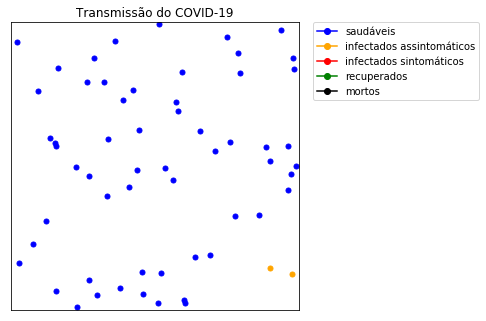

In [142]:
DATA = []
P = Pessoas(60, 10.01, 10.01, 0.1, 1, 0.8, 0.1, 0.1)


blue_patch = mlines.Line2D([], [], color = 'blue', marker = 'o', label = 'saudáveis')
orange_patch = mlines.Line2D([], [], color = 'orange', label = 'infectados assintomáticos', marker = 'o')
red_patch = mlines.Line2D([], [], color = 'red', label = 'infectados sintomáticos', marker = 'o')
green_patch = mlines.Line2D([], [], color = 'green', label = 'recuperados', marker = 'o')
black_patch = mlines.Line2D([], [], color = 'black', label = 'mortos', marker = 'o')



fig = plt.figure(figsize = (8,5))
ax = fig.add_axes([0.05, 0.1, 0.5, 0.8])


#ax.axis('off')
plt.xlim(0,P.tam_x)
plt.ylim(0,P.tam_y)
plt.xticks([])
plt.yticks([])
plt.title('Transmissão do COVID-19')

plt.legend(handles = [blue_patch, orange_patch, red_patch, green_patch, black_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.legend(loc="upper left", bbox_to_anchor=(1,1))

ondes = []
for i in range(P.n):
    pontopessoa, = plt.plot(P.pos[i],'o',markersize = 5, color = P.estados[i])
    ondes.append(pontopessoa)

def anima(i):
    
    P.update()
    for i, pessoa in enumerate(ondes):
        
        if P.tempo_morte[i] >= morreu_de_verdade:
            pessoa.set_data([],[])
        else:    
            pessoa.set_data(P.pos[i])
            pessoa.set_color(P.estados[i])
    DATA.append(P.percent_new)
    return ondes[0],

ani = FuncAnimation(fig,anima,frames = np.arange(0,150,1),interval = 100, blit=True, repeat=True)
#ani.save('/Users/macbookpro/Desktop/testecovid.mp4')

#ani.to_html5_video()
#ani.save(r'covidtest.mp4', fps = 10)





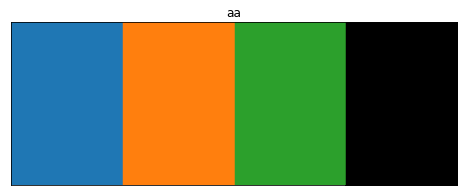

In [143]:
fig = plt.figure(figsize=(8,3))
plt.title('aa')

plt.plot([0.25,0.25],[0,1])
plt.plot([0.5,0.5],[0,1])
plt.plot([0.75,0.75],[0,1])
plt.fill_between([0,0.25], [1,1]) ##suscetiveis
plt.fill_between([0.25,0.5], [1,1]) ##infectados
plt.fill_between([0.5,0.75],[1,1]) ## recuperados
plt.fill_between([0.75,1], [1,1], color = 'k') ## mortos

plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks([])
plt.yticks([])
plt.show()

In [144]:
DATA

[[0, 0.9666666666666667, 1.0, 1.0, 1.0]]

In [166]:
DATA = []
frames = 5000
x = np.linspace(0, 1)
P = Pessoas(60, 10.01, 10.01, 0.1, 1, 0.8, 0.1, 0.1)

for i in range(frames):
    DATA.append(P.percent_new)
    P.update()

In [167]:
need_to_remove = []
for i in range(frames):
    will_remove = []
    for j in range(len(DATA[i])-1):
        if DATA[i][j] == DATA[i][j+1]:
            will_remove.append(j)
    need_to_remove.append(will_remove)
#need_to_remove

In [168]:
new_DATA = []
cores_anim = []
for i, vector in enumerate(need_to_remove):
    cor = ['blue', 'red', 'green', 'black']
    new_DATAi = np.delete(DATA[i], vector).tolist()
    new_cor = np.delete(cor, vector).tolist()
    new_DATA.append(new_DATAi)
    cores_anim.append(new_cor)

In [170]:
cores_anim

[['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 

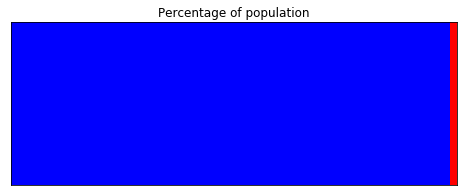

In [177]:
#DATA = []
frames = 5000
x = np.linspace(0, 1)
#P = Pessoas(60, 10.01, 10.01, 0.1, 1, 0.8, 0.1, 0.1)

#for i in range(frames):
#    DATA.append(P.percent_new)
#    P.update()
fig, ax = plt.subplots(figsize = (8,3))
ax.set_title("Percentage of population")
ax.set_yticks([])
ax.set_xticks([])

def animate(i):
    cores = ['blue', 'red', 'green', 'black']
    ax.clear()
    badcolors = []
    ax.set_title("Percentage of population")
    ax.set_yticks([])
    ax.set_xticks([])
    ax.contourf([x,x],new_DATA[i], colors = cores_anim[i])
    
interval = 5000#in seconds     
ani = animation.FuncAnimation(fig,animate,400,interval=100,blit=False)

plt.show()

ani.save('test2.mp4')

In [34]:
DATA

[[0, 0.9833333333333333, 1.0, 1.0, 1.0],
 [0, 0.9666666666666667, 0.999999997, 0.999999999, 1.0],
 [0, 0.9666666666666667, 0.999999997, 0.999999999, 1.0],
 [0, 0.9666666666666667, 0.999999997, 0.999999999, 1.0],
 [0, 0.9666666666666667, 0.999999997, 0.999999999, 1.0],
 [0, 0.95, 0.999999997, 0.999999999, 1.0],
 [0, 0.95, 0.999999997, 0.999999999, 1.0],
 [0, 0.95, 0.999999997, 0.999999999, 1.0],
 [0, 0.95, 0.999999997, 0.999999999, 1.0],
 [0, 0.95, 0.999999997, 0.999999999, 1.0],
 [0, 0.95, 0.999999997, 0.999999999, 1.0],
 [0, 0.9166666666666666, 0.999999997, 0.999999999, 1.0],
 [0, 0.8666666666666667, 0.999999997, 0.999999999, 1.0],
 [0, 0.85, 0.999999997, 0.999999999, 1.0],
 [0, 0.8333333333333334, 0.999999997, 0.999999999, 1.0],
 [0, 0.8166666666666667, 0.999999997, 0.999999999, 1.0],
 [0, 0.8166666666666667, 0.999999997, 0.999999999, 1.0],
 [0, 0.8166666666666667, 0.999999997, 0.999999999, 1.0],
 [0, 0.8166666666666667, 0.999999997, 0.999999999, 1.0],
 [0, 0.8166666666666667, 0.9999

In [13]:
P = Pessoas(60, 10.01, 10.01, 0.1, 1, 0.8, 0.1, 0.1)

DATA = np.zeros(P.estados_possiveis, 500)
for i in range(500):
    DATA

TypeError: 'str' object cannot be interpreted as an integer

In [16]:
np.zeros([10,5])

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])